In [1]:
%pylab inline 
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import jax_cosmo as jc
import jax.numpy as np
cosmo = jc.Planck15()

In [3]:
results_dict = pickle.load( open( "/Users/dl264294/Desktop/github/DifferentiableHOS/scripts/test_results.pkl", "rb" ) )

In [4]:
k=results_dict['k']
ps=results_dict['power_spectrum']
jac=results_dict['jac']

In [5]:
ps.shape

(13,)

Populating the interactive namespace from numpy and matplotlib


/Users/dl264294/.conda/envs/env_nbody/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Text(0, 0.5, 'P(k)')

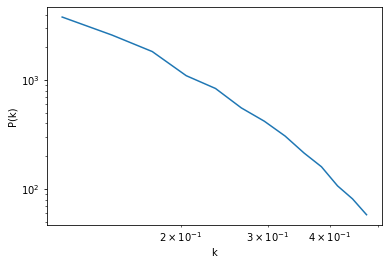

In [6]:
%pylab inline
#white noise powerspectra...
plt.loglog(k,ps)
plt.xlabel("k")
plt.ylabel("P(k)")

In [7]:

import jax_cosmo.transfer as tklib
ps_jax_nonlinear=jc.power.nonlinear_matter_power(cosmo, k/cosmo.h,a=1.0)
ps_jax_linear=jc.power.linear_matter_power(cosmo, k/cosmo.h,a=1.0)

/Users/dl264294/.local/lib/python3.8/site-packages/jax/_src/lax/lax.py:6081: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


Populating the interactive namespace from numpy and matplotlib


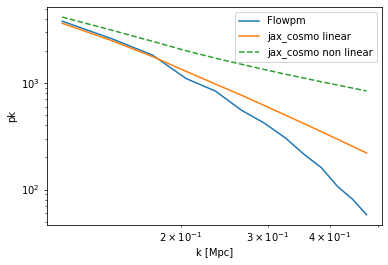

In [11]:
%pylab inline
loglog(k,ps,label='Flowpm')
loglog(k,ps_jax_linear/cosmo.h, label='jax_cosmo linear')
loglog(k,ps_jax_nonlinear/cosmo.h, '--', label='jax_cosmo non linear')
legend()
xlabel('k [Mpc]')
ylabel('pk');

Populating the interactive namespace from numpy and matplotlib


/Users/dl264294/.local/lib/python3.8/site-packages/jax/_src/lax/lax.py:6081: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


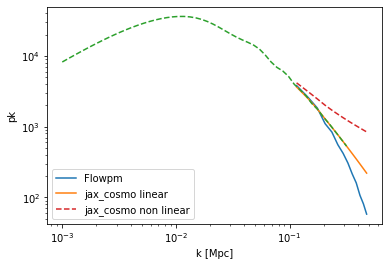

In [9]:
loglog(k,ps,label='Flowpm')
loglog(k,ps_jax_linear/cosmo.h, label='jax_cosmo linear')
loglog(np.logspace(-3,-0.5),jc.power.linear_matter_power(cosmo, np.logspace(-3,-0.5)/cosmo.h,a=1.0)/cosmo.h,'--')
loglog(k,ps_jax_nonlinear/cosmo.h, '--', label='jax_cosmo non linear')
legend()
xlabel('k [Mpc]')
ylabel('pk');
